In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
df=pd.read_csv('d:dataset/Melbourne_housing1.csv')
df.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Price
0,2,2.5,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,NaN
1,2,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,1480000.0
2,2,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,1035000.0
3,3,2.5,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,NaN
4,3,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,1465000.0


In [48]:
df.isna().sum()

Rooms               0
Distance            1
Bedroom2         8217
Bathroom         8226
Car              8728
Landsize        11810
BuildingArea    21115
YearBuilt       19306
Lattitude        7976
Longtitude       7976
Price            7610
dtype: int64

In [49]:
df.dropna(inplace=True)

In [50]:
df.shape

(8887, 11)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


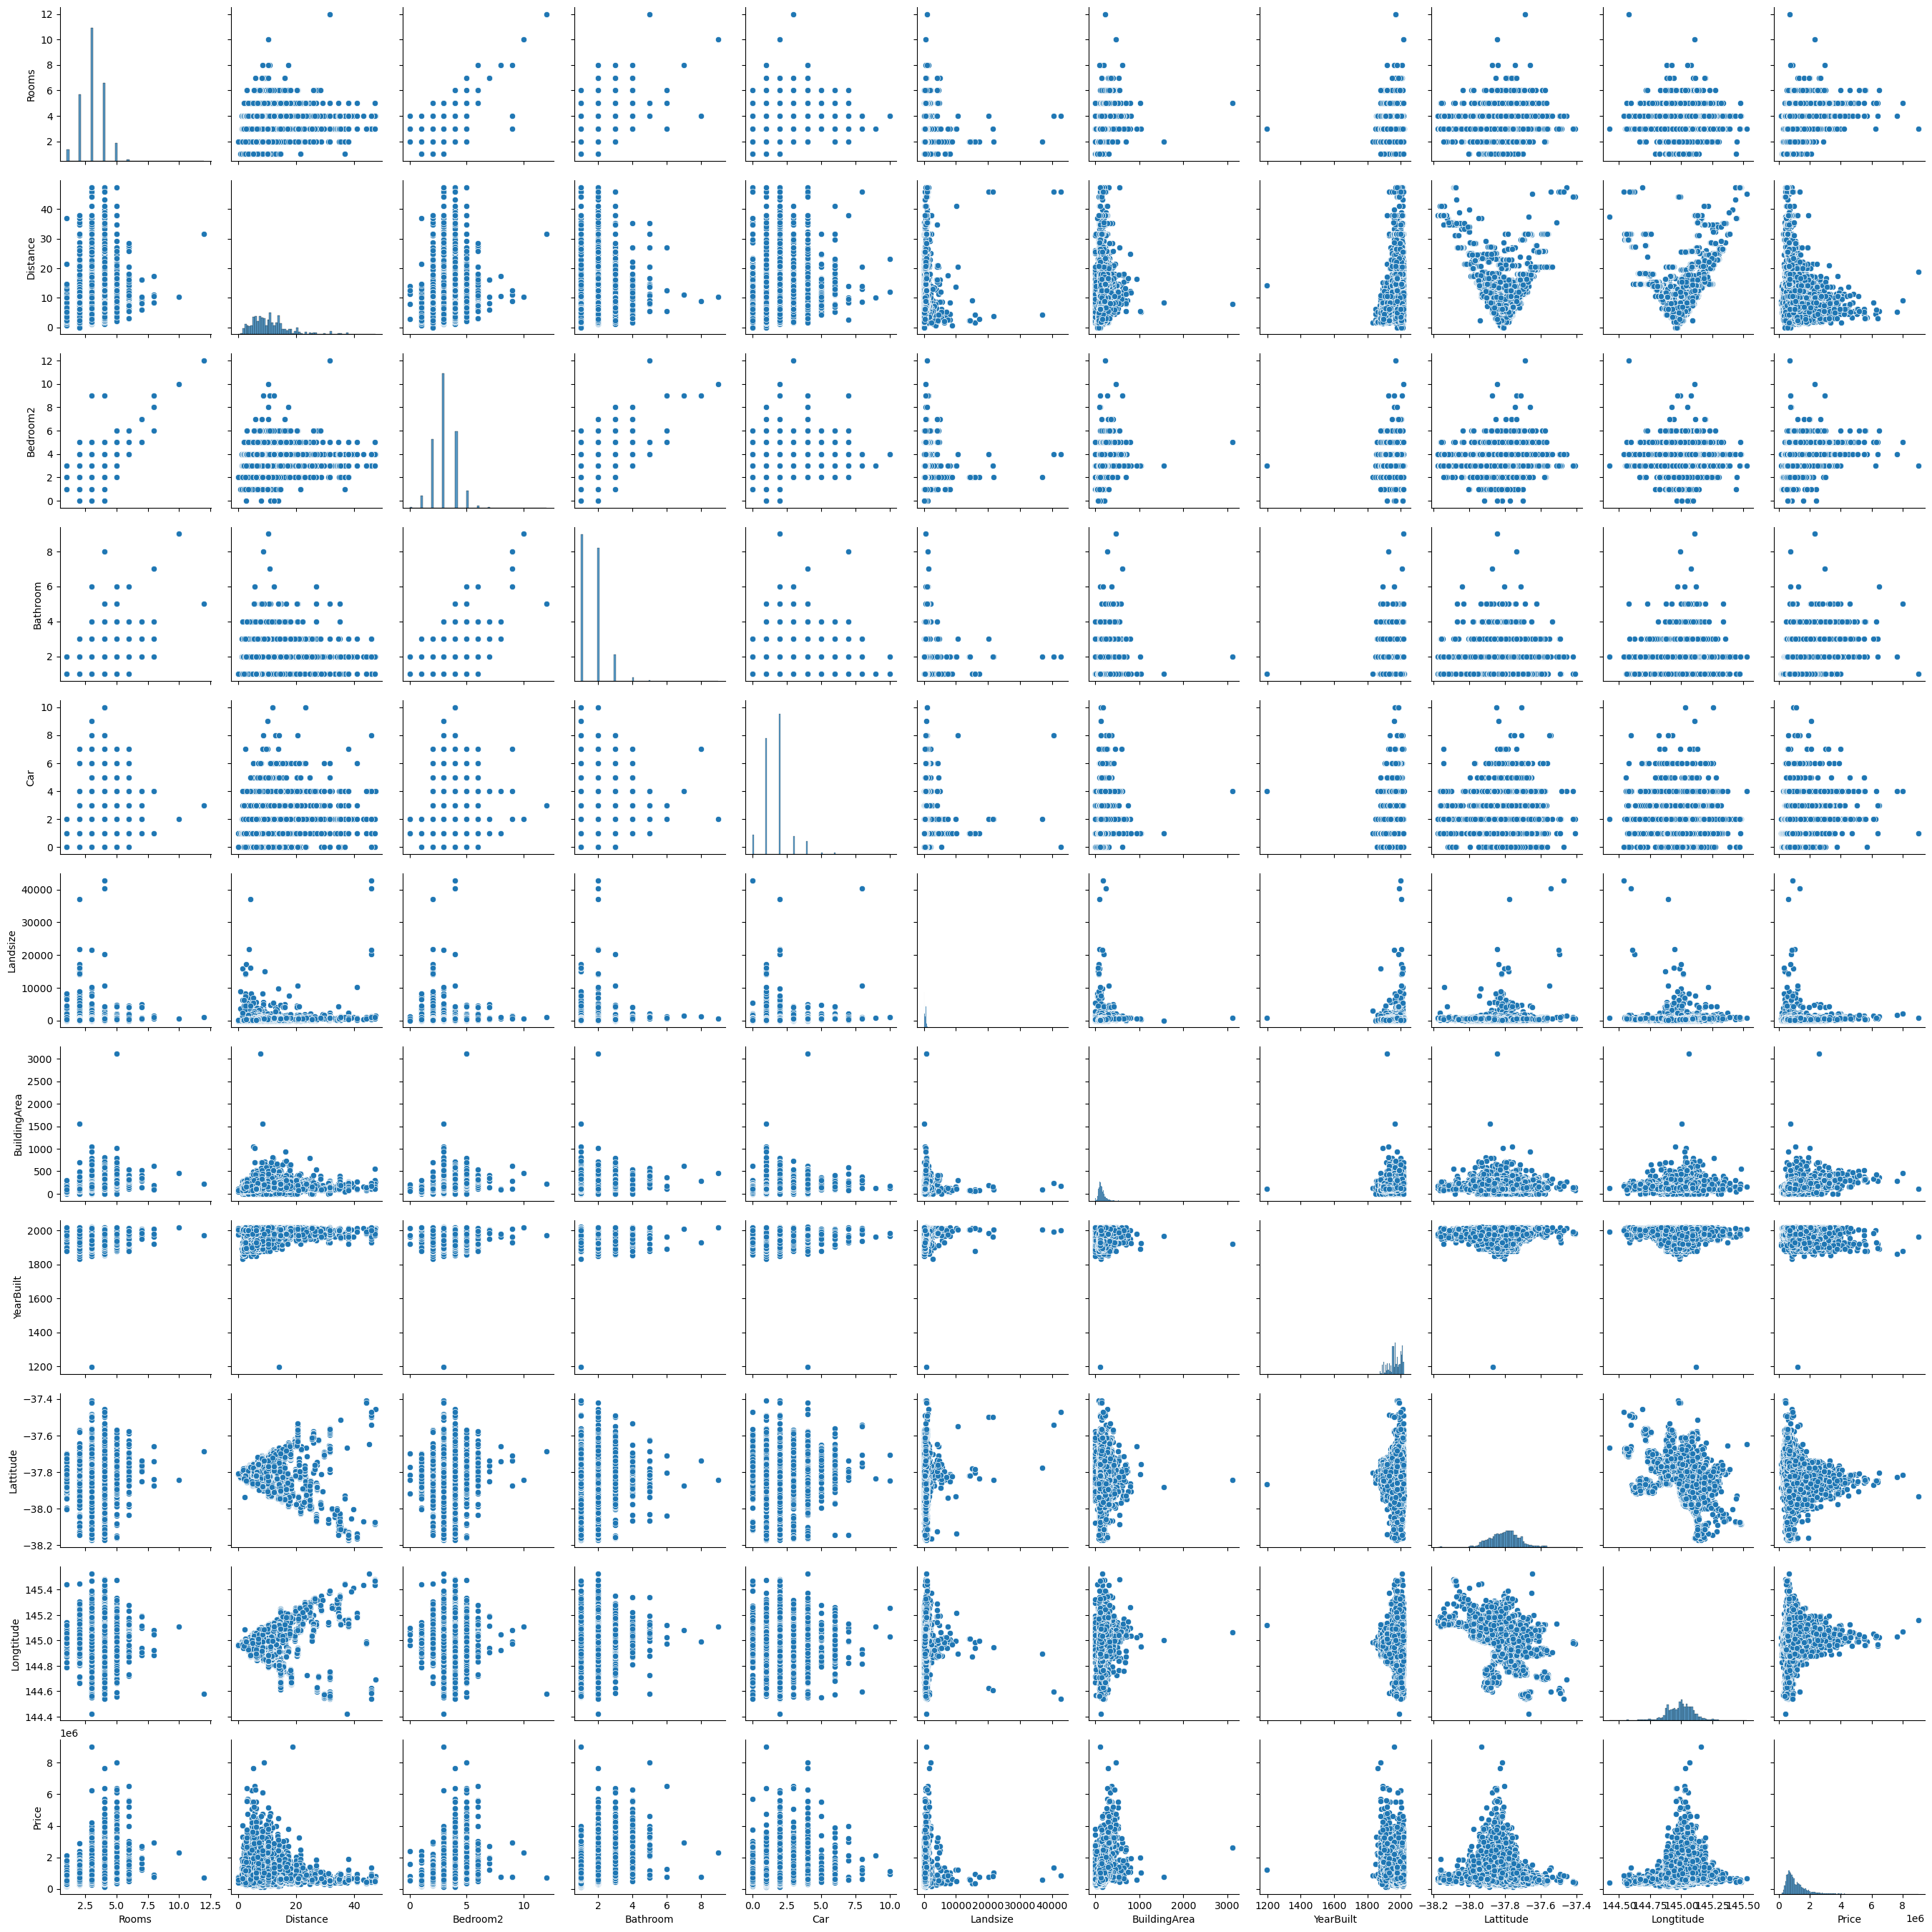

In [57]:
sn.pairplot(df)
plt.show()

In [51]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7998, 10)
(889, 10)
(7998,)
(889,)


In [54]:
def linear_regression(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions


def ridge_regression(X_train, y_train, X_test, alpha=1.0):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions


def lasso_regression(X_train, y_train, X_test, alpha=1.0):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions


def elastic_net_regression(X_train, y_train, X_test, alpha=1.0, l1_ratio=0.5):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return model, predictions


def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

In [55]:
linear_reg_model, linear_reg_predictions = linear_regression(X_train, y_train, X_test)
linear_reg_mse, r2 = evaluate_model(linear_reg_model, X_test, y_test)
print("Linear Regression MSE:", linear_reg_mse)
print("Linear Regression R-squared:", r2)

ridge_model, ridge_predictions = ridge_regression(X_train, y_train, X_test, alpha=0.5)
ridge_mse,r2 = evaluate_model(ridge_model, X_test, y_test)
print("Ridge Regression MSE:", ridge_mse)
print("Ridge Regression R-squared:",r2)

lasso_model, lasso_predictions = lasso_regression(X_train, y_train, X_test, alpha=0.5)
lasso_mse,r2 = evaluate_model(lasso_model, X_test, y_test)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R-squared:",r2)

elastic_net_model, elastic_net_predictions = elastic_net_regression(X_train, y_train, X_test, alpha=0.5, l1_ratio=0.5)
elastic_net_mse,r2 = evaluate_model(elastic_net_model, X_test, y_test)
print("Elastic Net Regression MSE:", elastic_net_mse)
print("Elastic Net Regression R-squared:",r2)

Linear Regression MSE: 258690511933.05307
Linear Regression R-squared: 0.45384842155807836
Ridge Regression MSE: 258756766659.4773
Ridge Regression R-squared: 0.4537085435117386
Lasso Regression MSE: 258691374316.9493
Lasso Regression R-squared: 0.4538466008792965
Elastic Net Regression MSE: 318040376925.64703
Elastic Net Regression R-squared: 0.32854802996734
